In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

df=pd.read_csv('question3.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
G1        10 non-null float64
G2        10 non-null float64
G3        10 non-null float64
G4        10 non-null float64
G5        10 non-null float64
G6        10 non-null float64
G7        10 non-null float64
Output    10 non-null object
dtypes: float64(7), object(1)
memory usage: 768.0+ bytes


In [73]:
#use label encoder to translate the targets into numbers
le=preprocessing.LabelEncoder()
Output_encoded=le.fit_transform(df.Output)
df["Output_cat"]=Output_encoded

In [74]:
df

,G1,G2,G3,G4,G5,G6,G7,Output,Output_cat,G1_2,G2_2,G3_2,G4_2,G5_2,G6_2,G7_2
0,1.0,2.3,5.2,1.2,5.3,2.6,2.3,Yes,1,1.0,2.3,5.2,1.2,5.3,2.6,2.3
1,2.0,3.6,1.8,2.3,1.6,2.1,1.5,No,0,2.0,3.6,1.8,2.3,1.6,2.1,1.5
2,1.5,1.5,4.1,1.3,1.2,3.1,1.6,Yes,1,1.5,1.5,4.1,1.3,1.2,3.1,1.6
3,2.2,1.9,9.5,1.5,1.5,4.2,1.4,No,0,2.2,1.9,9.5,1.5,1.5,4.2,1.4
4,3.9,2.4,5.3,1.7,1.6,2.5,2.9,Yes,1,3.9,2.4,5.3,1.7,1.6,2.5,2.9
5,5.1,3.6,2.7,2.6,1.7,2.8,3.4,Yes,1,5.1,3.6,2.7,2.6,1.7,2.8,3.4
6,1.8,4.2,3.6,3.5,1.6,3.4,1.3,No,0,1.8,4.2,3.6,3.5,1.6,3.4,1.3
7,2.3,1.5,7.2,4.1,7.1,3.1,1.8,No,0,2.3,1.5,7.2,4.1,7.1,3.1,1.8
8,4.2,2.4,6.2,2.9,2.5,3.3,2.5,Yes,1,4.2,2.4,6.2,2.9,2.5,3.3,2.5
9,3.6,5.6,1.9,3.2,2.6,5.2,2.7,No,0,3.6,5.6,1.9,3.2,2.6,5.2,2.7


In [75]:
feature=df.values[:,0:7]
target=df.values[:,8]
target=target.astype(int)
feature=feature.astype(float)

In [76]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(feature,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [77]:
predict_test=np.array([[2.1,2.2,3.2,1.4,5.1,2.4,1.4],[2.4,2.3,3.4,3.8,2.3,5.7,5.2]])

In [78]:
model.predict(predict_test)

array([1, 1])

In [79]:
xTrain,xTest,yTrain,yTest=train_test_split(feature,target,test_size=0.5,random_state=0)

In [80]:
model.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
yPredict=model.predict(xTest)

In [82]:
from sklearn import metrics
metrics.accuracy_score(yTest,yPredict)
print(metrics.classification_report(yTest,yPredict))
print(metrics.confusion_matrix(yTest,yPredict))
print(metrics.accuracy_score(yTest,yPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5

[[0 2]
 [1 2]]
0.4


In [83]:
fpr=dict()
tpr=dict()
roc_auc=dict()
score=model.predict_proba(xTrain)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(yTrain, score)

In [84]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.33333333 1.        ]
[0.  0.5 1. ]
[1.66666667 0.66666667 0.33333333]


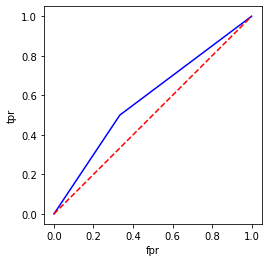

In [85]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(fpr,tpr,color='b')
ax.plot([0,1],[0,1],'r--')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.set_aspect('equal','box')